In [27]:
import pandas as pd
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from proteinbert import load_pretrained_model
from proteinbert.conv_and_global_attention_model import get_model_with_hidden_layers_as_outputs
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Read the Dataset 

In [43]:
df = pd.read_csv('/home/gdt-ws4/Desktop/cp_900.csv')

In [44]:
df

,Unnamed: 0,index,NO,PROTEIN,UniProt_ID,MUTATION,SOURCE,PDB_wild,PDB_Chain_Mutation,SEC_STR,...,∆∆G_(kcal/mol),∆∆G_H2O_(kcal/mol),STATE,REVERSIBILITY,PubMed_ID,KEY_WORDS,REFERENCE,AUTHOR,protein,mutated_sequence
0,0,0,27,NAD+ -dependent formate dehydrogenases (FDHs),A0A1U8PF82,wild-type,Gossypium hirsutum,-,-,-,...,-,-,-,No,33754169,Thermal stability; Oxidative stability; Cumula...,Appl Microbiol Biotechnol. 105(7):2787-2798 (2...,"Kurt S, Ordu E",MAMKQVANSAIKAIANSGSSSLLTRQLHASPGSKKIVGVFYKANEY...,MAMKQVANSAIKAIANSGSSSLLTRQLHASPGSKKIVGVFYKANEY...
1,1,1,255,Cytochrome c,P00004,wild-type,Equus caballus,1AKK,-,-,...,-,-,2,No,33762670,circular dichroism spectroscopy; Cytochrome c,"Sci Rep 11, 6804 (2021) PMID: 33762670","Naiyer A, Khan B, Hussain A, Islam A, Alajmi M...",MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...,MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...
2,2,2,257,Cytochrome c,P00004,L95G,Equus caballus,1AKK,-,Coil,...,-,-,2,No,33762670,circular dichroism spectroscopy; Cytochrome c,"Sci Rep 11, 6804 (2021) PMID: 33762670","Naiyer A, Khan B, Hussain A, Islam A, Alajmi M...",MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...,MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...
3,3,3,258,Cytochrome c,P00004,L95G,Equus caballus,1AKK,-,Coil,...,-,-,2,No,33762670,circular dichroism spectroscopy; Cytochrome c,"Sci Rep 11, 6804 (2021) PMID: 33762670","Naiyer A, Khan B, Hussain A, Islam A, Alajmi M...",MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...,0
4,4,4,349,Acyl carrier protein,P0A6A8,wild-type,Escherichia Coli,1ACP,-,-,...,-,-,-,-,8142886,denaturation; acyl carrier protein; NMR,"Protein Sci 3, 103-8 (1994) PMID: 8142886","Horvath LA, Sturtevant JM, Prestegard JH",MSTIEERVKKIIGEQLGVKQEEVTNNASFVEDLGADSLDTVELVMA...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,909,911,30916,CYP101,P00183,wild-type,Pseudomonas putida (Arthrobacter siderocapsula...,1AKD,-,-,...,-,-,-,Yes,20138909,Cytochrome P450; CYP175A1; Circular dichroism;...,"INT J BIOL MACROMOL 46, 412-418 (2010) PMID:20...","Behera RK, Mazumdar S.",MTTETIQSNANLAPLPPHVPEHLVFDFDMYNPSNLSAGVQEAWAVL...,0
910,910,912,30923,CYP101,P00183,wild-type,Pseudomonas putida (Arthrobacter siderocapsula...,1AKD,-,-,...,-,-,-,Yes,20138909,Cytochrome P450; CYP175A1; Circular dichroism;...,"INT J BIOL MACROMOL 46, 412-418 (2010) PMID:20...","Behera RK, Mazumdar S.",MTTETIQSNANLAPLPPHVPEHLVFDFDMYNPSNLSAGVQEAWAVL...,0
911,911,913,31429,Protein G,P06654,wild-type,Streptococcus sp. group G,1PGA,-,-,...,-,-,-,Unknown,1510916,globular folding unit; flexibility; transition...,"BIOCHEMISTRY 31, 7243-7248 (1992) PMID: 1510916","Alexander P, Orban J, Bryan P",MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,0
912,912,914,31430,Protein G,P06654,I232V L233I E245K A250E V255A E268V,Streptococcus sp. group G,1PGA,1pga_A:I6V 1pga_A:L7I 1pga_A:E19K 1pga_A:A24E ...,-,...,-,-,-,Unknown,1510916,globular folding unit; flexibility; transition...,"BIOCHEMISTRY 31, 7243-7248 (1992) PMID: 1510916","Alexander P, Orban J, Bryan P",MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,0


Make the original sequence to Mutated sequence

In [45]:
mutated_sequences = []
for index,i in enumerate(df['MUTATION']):
    if i !='wild-type':
       s= i.split(' ')
       original_sequence =df['protein'][index]
       mutated_sequence = original_sequence
       for i in range(len(s)):
           mutation = s[i]
           print(mutation)
           position = int(mutation[1:-1])  # Extract the position (25 in this case)
           new_amino_acid = mutation[-1]   # Extract the new amino acid (K in this case)
           mutated_sequence = mutated_sequence[:position - 1] + new_amino_acid + mutated_sequence[position:]
           print(original_sequence==mutated_sequence)
           mutated_sequences.append(mutated_sequence)
#                 print(original_sequence) 
#                 print(mutated_sequence) 
           df['mutated_sequence'][index]=mutated_sequence
    else:
        df['mutated_sequence'][index] = df['protein'][index]


L95G
False
L95G
False
C3S
False
C48S
False
E38C
False
W54C
False
V42C
False
R52C
False
R50A
False
R50K
False
R52A
False
R52Q
False
P4G
False
T43A
False
K50W
False
K50I
False
K50F
False
K50Y
False
K50L
False
K50V
False
K50M
False
K50E
False
K50Q
False
K50A
False
K50T
False
K50S
False
K50G
False
K50D
False
K50N
False
M87L
False
K50R
False
K50H
False
L26T
False
A27S
False
A50S
False
A110S
False
V111T
False
A114S
False
V117T
False
V118T
False
R39A
False
R39G
False
Y56A
False
Y56G
False
R68A
False
Q76A
False
H96A
False
N136A
False
N136G
False
C81S
False
C81G
False
C81A
False
C81V
False
C118S
False
C118A
False
C118V
False
C154S
False
C154A
False
C154V
False
G55A
False
G66A
False
G86A
False
G90A
False
G123A
False
G145A
False
G147A
False
E155G
False
D159G
False
E155G
False
E157G
False
E157G
False
D159G
False
E155G
False
E157G
False
D159G
False
P57A
False
P62A
False
P132A
False
P132G
False
P96A
False
P207A
False
V20G
False
V20I
False
V20L
False
V20M
False
V20F
False
V92G
False
V92I
False
V92L
F

/tmp/ipykernel_10756/1258236354.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mutated_sequence'][index] = df['protein'][index]
/tmp/ipykernel_10756/1258236354.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mutated_sequence'][index]=mutated_sequence


Remove Duplicated Sequence

In [46]:
duplicates = df[df['mutated_sequence'].duplicated()]

# Print or do something with the duplicates
print("Duplicate entries in column:", 'mutated_sequence')
df = df.drop_duplicates(subset='mutated_sequence', keep='first')


Duplicate entries in column: mutated_sequence


In [47]:
df = df.reset_index()

Remove unwanted parentheses

In [48]:
import re
def remove_parentheses(value):
    value = re.sub(r'\([^)]*\)', '', value)
    return float(re.sub(' ', '', value))

df['∆Cp_(kcal/mol)'] = df['∆Cp_(kcal/mol)'].apply(remove_parentheses)

Take sequence length 

In [50]:
df['seq_len'] = df['mutated_sequence'].apply(len)

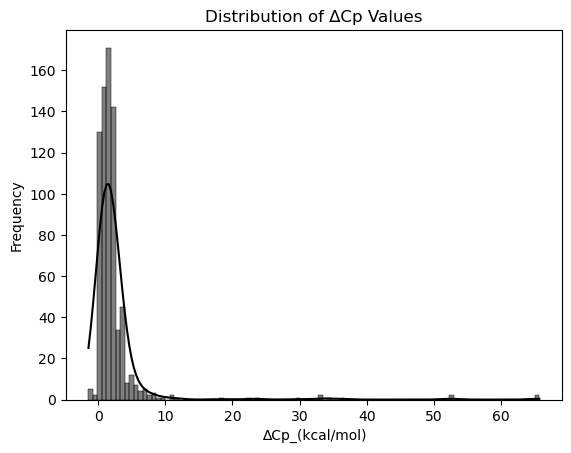

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram plot
sns.histplot(df['∆Cp_(kcal/mol)'], bins=100, kde=True,color='black')

# Add labels and title
plt.xlabel('∆Cp_(kcal/mol)')  # Update the label for 'Tm'
plt.ylabel('Frequency')
plt.title('Distribution of ∆Cp Values')

# Display the plot
plt.show()

# Save the plot as an image (e.g., PNG)


In [52]:
df.columns

Index(['level_0', 'Unnamed: 0', 'index', 'NO', 'PROTEIN', 'UniProt_ID',
       'MUTATION', 'SOURCE', 'PDB_wild', 'PDB_Chain_Mutation', 'SEC_STR',
       'ASA', 'pH', 'T_(C)', 'MEASURE', 'METHOD', 'BUFFER_NAME', 'BUFFER_CONC',
       'ION_NAME_1', 'ION_CONC_1', '∆Cp_(kcal/mol)', '∆∆G_(kcal/mol)',
       '∆∆G_H2O_(kcal/mol)', 'STATE', 'REVERSIBILITY', 'PubMed_ID',
       'KEY_WORDS', 'REFERENCE', 'AUTHOR', 'protein', 'mutated_sequence',
       'seq_len'],
      dtype='object')

In [53]:
df = df[['∆Cp_(kcal/mol)','UniProt_ID','mutated_sequence']].copy()
df['seq_len'] = df['mutated_sequence'].apply(len)

In [54]:
df

,∆Cp_(kcal/mol),UniProt_ID,mutated_sequence,seq_len
0,-1.440000,A0A1U8PF82,MAMKQVANSAIKAIANSGSSSLLTRQLHASPGSKKIVGVFYKANEY...,382
1,1.220000,P00004,MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...,105
2,0.700000,P00004,MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...,105
3,0.800000,P0A6A8,MSTIEERVKKIIGEQLGVKQEEVTNNASFVEDLGADSLDTVELVMA...,78
4,0.310000,P03023,MKPVTLYDVAEYAGVSYQTVSRVVNQASHVSAKTREKVEAAMAELN...,360
...,...,...,...,...
734,2.300000,P68135,MCDEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVM...,377
735,2.400000,P13231,MGNRAFKSHHGHFLSAEGEAVKTHHGHHDHHTHFHVENHGGKVALK...,118
736,1.360000,P00183,MTTETIQSNANLAPLPPHVPEHLVFDFDMYNPSNLSAGVQEAWAVL...,415
737,2.900000,P06654,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,448


In [55]:
df = df[df['∆Cp_(kcal/mol)']>0]

In [56]:
df = df[df['∆Cp_(kcal/mol)']<40]

In [57]:
duplicates = df[df['mutated_sequence'].duplicated()]

# Print or do something with the duplicates
print("Duplicate entries in column:", 'mutated_sequence')
df = df.drop_duplicates(subset='mutated_sequence', keep='first')


Duplicate entries in column: mutated_sequence


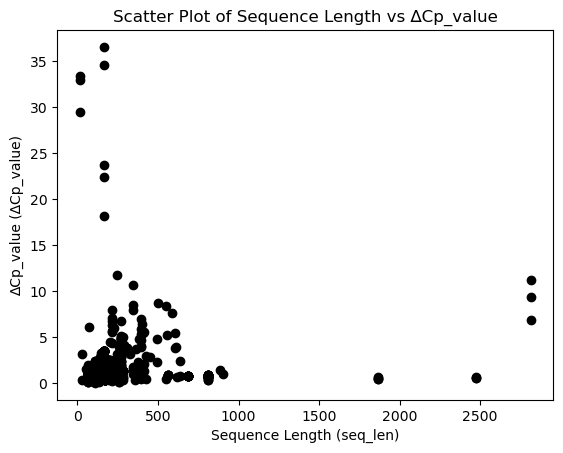

In [58]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.scatter(df['seq_len'], df['∆Cp_(kcal/mol)'],color='black')  # Use 'tm value' as the y-axis label

# Add labels for the x and y axes
plt.xlabel('Sequence Length (seq_len)')
plt.ylabel('∆Cp_value (∆Cp_value)')  # Update the y-axis label

# Add a title to the plot
plt.title('Scatter Plot of Sequence Length vs ∆Cp_value')

# Display the plot
plt.show()


In [60]:
# Assuming 'df' is your DataFrame
protein_sequences = df['mutated_sequence']
delta_g_values = df['∆Cp_(kcal/mol)']

# Define the amino acids and their order
amino_acids = "ACDEFGHIKLMNPQRSTVWY"

def one_hot_encode_sequence(sequence):
    # Create a dictionary to map each amino acid to an index
    aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
    
    # Initialize an array of zeros with the shape (sequence_length, number_of_amino_acids)
    sequence_length = len(sequence)
    one_hot_encoded = np.zeros((sequence_length, len(amino_acids)), dtype=int)
    
    # Set the appropriate index to 1 for each amino acid in the sequence
    for i, aa in enumerate(sequence):
        one_hot_encoded[i, aa_to_index[aa]] = 1
    
    return one_hot_encoded

# One-hot encode all the protein sequences in the DataFrame
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have a list of one-hot encoded sequences
encoded_sequences = [one_hot_encode_sequence(seq) for seq in protein_sequences]

#Find the maximum sequence length
max_sequence_length = max(len(seq) for seq in encoded_sequences)

# Pad sequences to the maximum length
padded_sequences = pad_sequences(encoded_sequences, maxlen=max_sequence_length, padding='post', truncating='post', dtype='float32')

# Convert the padded_sequences list to a numpy array
X = np.array(padded_sequences)
#float_array = [float(string) for string in delta_g_values]
# Convert the delta_g_values to a numpy array
y = np.array(delta_g_values)
del protein_sequences
del delta_g_values
del encoded_sequences
del padded_sequences


In [61]:
# Split the data into 70% training and 30% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3,random_state=42)

# # Split the remaining data (30%) into 10% validation and 20% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# # Print the shapes of the datasets
print("Training data shapes:", X_train.shape, y_train.shape)
print("Validation data shapes:", X_val.shape, y_val.shape)
print("Test data shapes:", X_test.shape, y_test.shape)


Training data shapes: (493, 2813, 20) (493,)
Validation data shapes: (69, 2813, 20) (69,)
Test data shapes: (143, 2813, 20) (143,)


In [62]:
# Set the input shape and number of classes (1 for regression)
input_shape = (X_train.shape[1:])
num_classes = 1

# Create the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='linear'))  # Using 'linear' activation for regression

# Compile the model with appropriate loss function and optimizer
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Apply learning rate scheduling
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5, verbose=1)

# Train the model using the training dataset and validate on the validation set
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[lr_scheduler])


2023-11-30 12:39:27.854289: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-30 12:39:27.972617: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-30 12:39:27.973086: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/100


2023-11-30 12:39:30.912989: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-30 12:39:32.856831: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6675e110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-30 12:39:32.856851: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-11-30 12:39:32.864012: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-30 12:39:32.938544: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 [==============================] - 6s 49ms/step - loss: 13.1041 - val_loss: 3.0041 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 0s 10ms/step - loss: 11.5666 - val_loss: 2.2095 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 0s 10ms/step - loss: 9.9851 - val_loss: 1.6150 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 7.6122 - val_loss: 1.4267 - lr: 0.0010
Epoch 5/100
16/16 [==============================] - 0s 10ms/step - loss: 5.3078 - val_loss: 2.8705 - lr: 0.0010
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 5.8759 - val_loss: 1.3233 - lr: 0.0010
Epoch 7/100
16/16 [==============================] - 0s 10ms/step - loss: 4.9826 - val_loss: 1.4367 - lr: 0.0010
Epoch 8/100
16/16 [==============================] - 0s 10ms/step - loss: 4.6166 - val_loss: 1.6971 - lr: 0.0010
Epoch 9/100
16/16 [==============================] - 0s 10ms/step - loss: 4.4437 - val_loss: 1.4672 - lr: 

In [63]:
# Assuming you have predictions and true values as numpy arrays
prediction = model.predict(X_test)
y_true = np.array(y_test)  # True delta_G values for the test data
y_pred = prediction.reshape(-1)  # Reshape predictions to a 1D array if needed

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Calculate coefficient of determination (R-squared score)
r2_score_value = r2_score(y_true, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2_score_value)


5/5 [==============================] - 0s 25ms/step
Mean Squared Error (MSE): 2.1244600154119517
R-squared Score: 0.7781163513937326


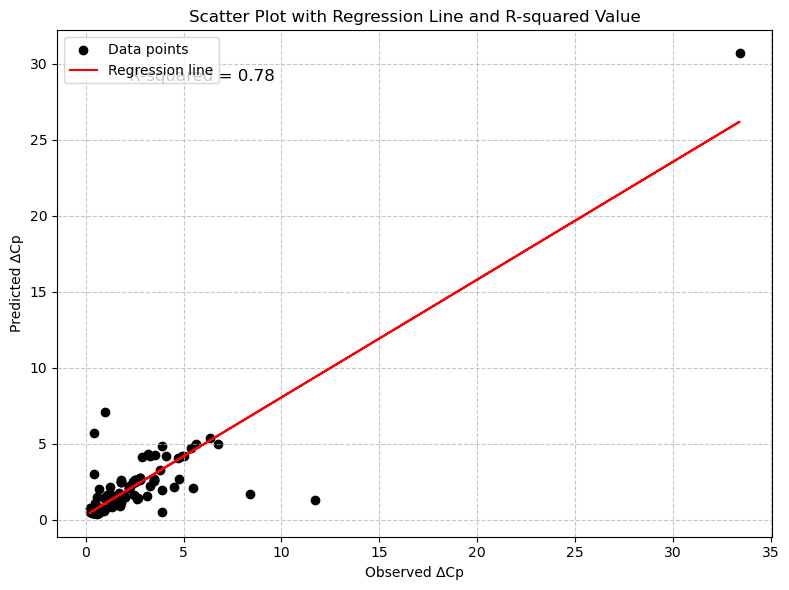

In [64]:
import matplotlib.pyplot as plt
regression_line = np.polyfit(y_true, y_pred, 1)
regression_fn = np.poly1d(regression_line)

# Calculate the R-squared value
r2 = r2_score(y_true, y_pred)

# Create a scatter plot with regression line and R-squared value
plt.figure(figsize=(8, 6))

plt.scatter(y_true, y_pred, color='black', label='Data points')
plt.plot(y_true, regression_fn(y_true), color='red', label='Regression line')

# Annotate with R-squared value
plt.annotate(f'R-squared = {r2:.2f}', (0.1, 0.9), xycoords='axes fraction', fontsize=12)

plt.xlabel('Observed ∆Cp')
plt.ylabel('Predicted ∆Cp')
plt.title('Scatter Plot with Regression Line and R-squared Value')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [65]:
df

,∆Cp_(kcal/mol),UniProt_ID,mutated_sequence,seq_len
1,1.22,P00004,MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...,105
2,0.70,P00004,MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...,105
3,0.80,P0A6A8,MSTIEERVKKIIGEQLGVKQEEVTNNASFVEDLGADSLDTVELVMA...,78
4,0.31,P03023,MKPVTLYDVAEYAGVSYQTVSRVVNQASHVSAKTREKVEAAMAELN...,360
5,2.01,P23904,MKKKSCFTLVTTFAFSLIFSVSALAGSVFWEPLSYFNRSTWEKADG...,237
...,...,...,...,...
733,1.52,P03040,MEQRITLKDYAMRFGQTKTAKDLGVYQSAINKAIHAGRKIFLTINA...,66
734,2.30,P68135,MCDEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVM...,377
735,2.40,P13231,MGNRAFKSHHGHFLSAEGEAVKTHHGHHDHHTHFHVENHGGKVALK...,118
736,1.36,P00183,MTTETIQSNANLAPLPPHVPEHLVFDFDMYNPSNLSAGVQEAWAVL...,415


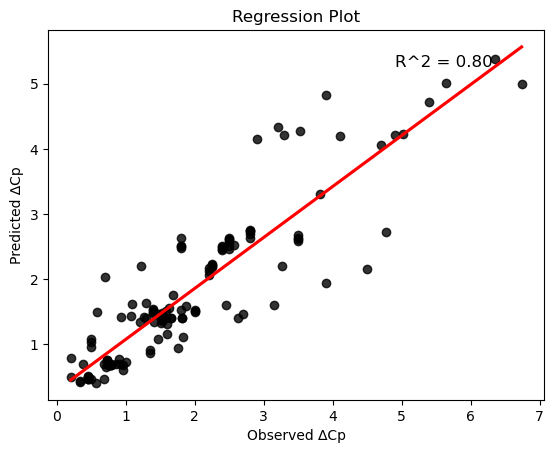

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
X = y_true
Y = y_pred
# Fit a linear regression model
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Create the regression line equation
regression_line = slope * X + intercept
# Calculate residuals (differences between observed and predicted values)
residuals = Y - regression_line

# Define a threshold for outliers (you can adjust this threshold as needed)
threshold = 2.0

# Create a mask to identify outliers
outlier_mask = np.abs(residuals) < threshold

# Filter the data to remove outliers
X_filtered = X[outlier_mask]
Y_filtered = Y[outlier_mask]
# Calculate R-squared (R^2) value
r_squared = stats.linregress(X_filtered, Y_filtered).rvalue ** 2

# Create a Seaborn scatterplot with regression line
sns.regplot(x=X_filtered, y=Y_filtered, ci=None, line_kws={"color": "red"}, scatter_kws={"color": "black"})

# Add labels, a title, and annotate with R^2
plt.xlabel("Observed ∆Cp")
plt.ylabel("Predicted ∆Cp")
plt.title("Regression Plot")

# Annotate the plot with R^2 value
plt.annotate(f"R^2 = {r_squared:.2f}", xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12)

# Show the plot
plt.show()


Prediction of model

In [63]:
import numpy as np
from keras.models import load_model

# Protein sequence for prediction
protein_sequence = 'CGVPAIQPVLSGLSRIVNGEEAVPGSWPWQVSLQDKTGFHFCGGSLINENWVVTAAHCGVTTSDVVVAGEFDQGSSSEKIQKLKIAKVFKNSKYNSLTINNDITLLKLSTAASFSQTVSAVCLPSASDDFAAGTTCVTTGWGLTRYTNANTPDRLQQASLPLLSNTNCKKYWGTKIKDAMICAGASGVSSCMGDSGGPLVCKKNGAWTLVGIVSWGSSTCSTSTPGVYARVTALVNWVQQTLAAN'


# Load the model

# Define the amino acids and their order

amino_acids = "ACDEFGHIKLMNPQRSTVWY"

def one_hot_encode_sequence(sequence):
    # Create a dictionary to map each amino acid to an index
    aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
    
    # Initialize an array of zeros with the shape (sequence_length, number_of_amino_acids)
    sequence_length = len(sequence)
    one_hot_encoded = np.zeros((sequence_length, len(amino_acids)), dtype=int)
    
    # Set the appropriate index to 1 for each amino acid in the sequence
    for i, aa in enumerate(sequence):
        one_hot_encoded[i, aa_to_index[aa]] = 1
    
    return one_hot_encoded

# One-hot encode the protein sequence
encoded_sequence = one_hot_encode_sequence(protein_sequence)

# Pad the sequence to the desired length (34350)
desired_sequence_length = max_sequence_length
padded_encoded_sequence = np.pad(encoded_sequence, ((0, desired_sequence_length - len(encoded_sequence)), (0, 0)), 'constant')

# Reshape to a 3D array with shape (1, 34350, 20)
encoded_sequence_3D = padded_encoded_sequence[np.newaxis, :, :]

# Make predictions using the model
predicted_delta_g = model.predict(encoded_sequence_3D)

print("Predicted Cp value:", predicted_delta_g[0][0])


1/1 [==============================] - 0s 17ms/step
Predicted Cp value: 3.1907556


Save the model

In [68]:
model.save('cp_prediction.h5')

/home/gdt-ws4/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
